<a href="https://colab.research.google.com/github/Guhan2348519/lab-task/blob/main/2348519_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [8]:
data=pd.read_csv('/content/drive/MyDrive/spam_ham_dataset.csv')

In [9]:
data.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [10]:
print(data.isna().sum())


Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [11]:
data.shape

(5171, 4)

In [12]:
data = data.drop('Unnamed: 0', axis=1)

In [13]:
X = data['text']
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#converting text data into a numerical format
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)

# Predict using the trained model
y_pred = naive_model.predict(X_test_vec)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9719806763285024


In [15]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [16]:
spam_counts = data['label'].value_counts()

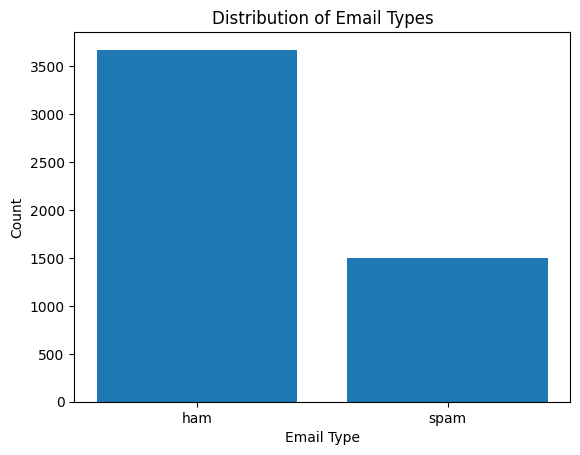

In [ ]:
plt.bar(spam_counts.index, spam_counts.values)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types')
plt.show()


In [20]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_vec, y_train)


In [21]:
print("Class distribution before resampling:")
print(y_train.value_counts())

# Perform resampling

print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before resampling:
0    2930
1    1206
Name: label_num, dtype: int64
Class distribution after resampling:
0    2930
1    2930
Name: label_num, dtype: int64


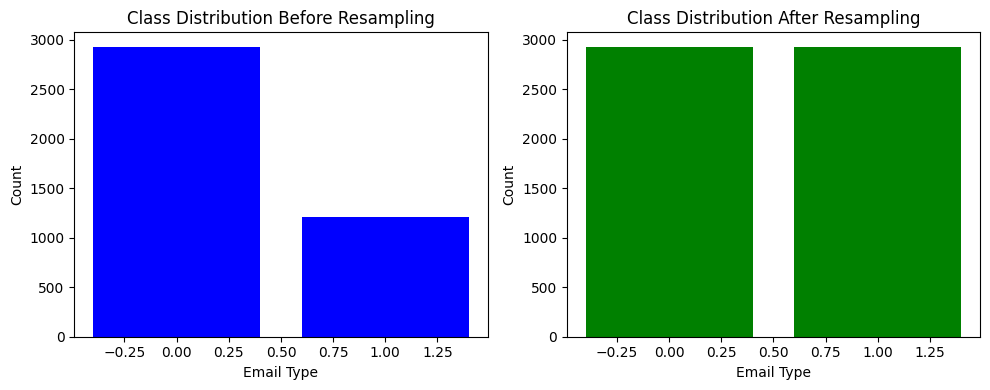

In [22]:
class_counts_before_resampling = y_train.value_counts()
class_counts_after_resampling = pd.Series(y_train_resampled).value_counts()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(class_counts_before_resampling.index, class_counts_before_resampling.values, color='blue')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Class Distribution Before Resampling')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after_resampling.index, class_counts_after_resampling.values, color='green')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Class Distribution After Resampling')

plt.tight_layout()
plt.show()

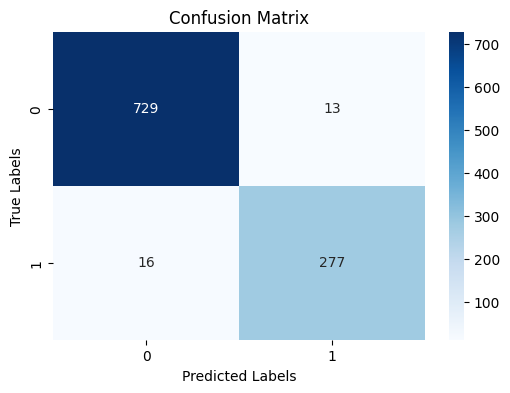

In [24]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
y_prob = naive_model.predict_proba(X_test_vec)[:, 1]


In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

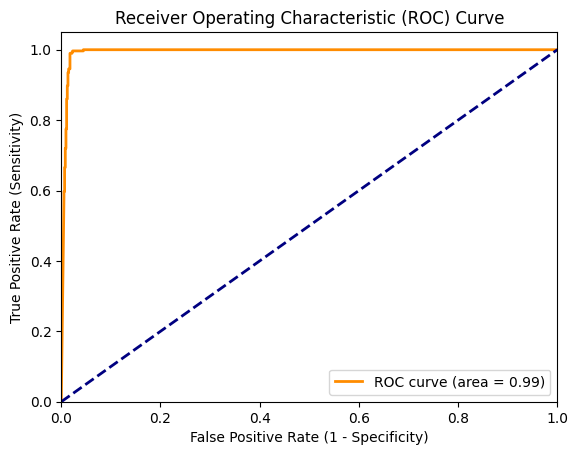

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

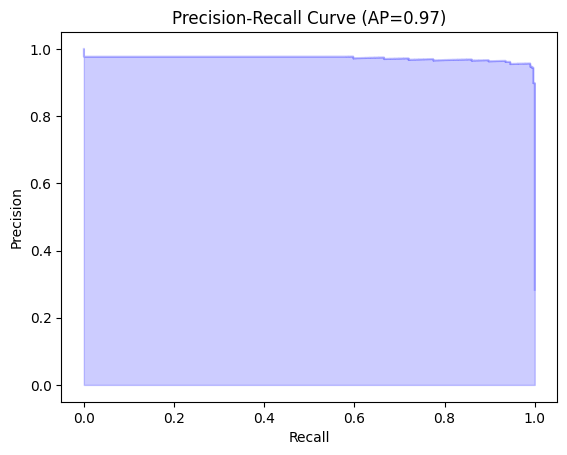

In [32]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.show()

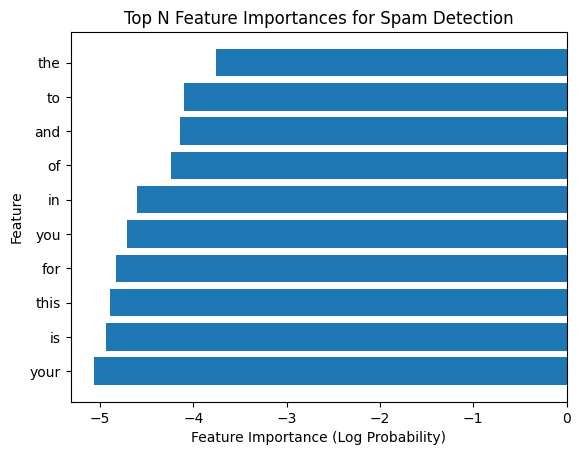

In [34]:
feature_names = vectorizer.get_feature_names_out()

# Get feature importances (log probabilities) from the trained model
feature_importances = naive_model.feature_log_prob_[1]  # Assuming you're interested in the 'Spam' class

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Choose the top N important features to display
top_n = 10  # Change this value to the number of top features you want to display

# Extract the top N feature importances and corresponding feature names
top_feature_importances = feature_importances[sorted_indices][:top_n]
top_feature_names = [feature_names[i] for i in sorted_indices][:top_n]

# Create a horizontal bar chart to visualize feature importance
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance (Log Probability)')
plt.ylabel('Feature')
plt.title('Top N Feature Importances for Spam Detection')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')


Accuracy: 0.97
Precision: 0.96
Recall: 0.95
F1-score: 0.95
AUC-ROC: 0.99


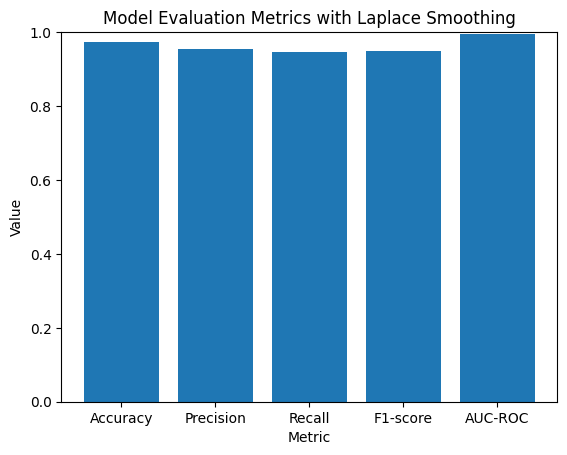

In [36]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, roc_auc]

# Create a DataFrame to store the metrics
metric_data = pd.DataFrame({'Metric': metrics, 'Value': values})
plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylim(0, 1)  # Set the y-axis range to [0, 1]
plt.show()

In [37]:
thresholds = np.arange(0, 1.05, 0.05)

# Initialize empty lists to store precision and recall values for each threshold
precisions = []
recalls = []

# Calculate precision and recall at each threshold
for threshold in thresholds:
    # Convert predicted probabilities to binary predictions based on the threshold
    y_pred_thresholded = (y_prob >= threshold).astype(int)

    # Calculate precision and recall for the thresholded predictions
    precision = precision_score(y_test, y_pred_thresholded)
    recall = recall_score(y_test, y_pred_thresholded)

    # Append precision and recall to the respective lists
    precisions.append(precision)
    recalls.append(recall)



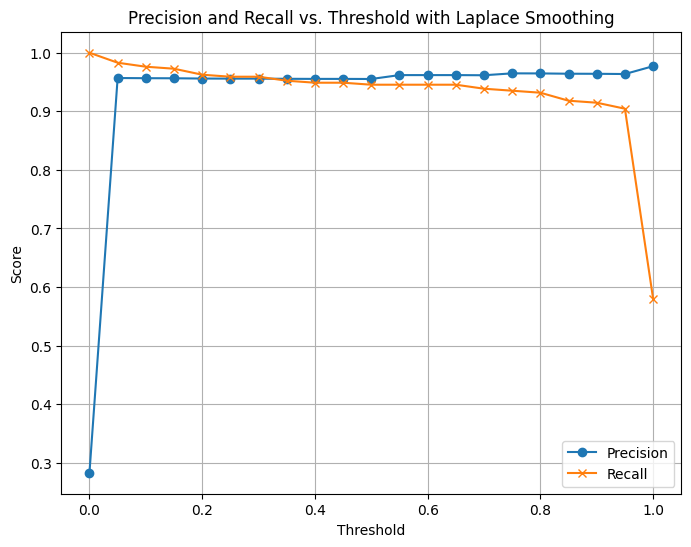

In [38]:
# Create a line graph to visualize the trade-offs between precision and recall
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold with Laplace Smoothing')
plt.legend()
plt.grid()
plt.show()